<a href="https://colab.research.google.com/github/the-ggoom/deep_learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [1] 컨볼루션(Convolution) 개념

<교수님 조크>
* 텍사스는 방언이 심해서 알아 듣기 힘들다.
<br>
<br>
<수업 내용>
* 원래 우리는 이미지를 그대로 넣어주는게 아니라, 각 숫자에 해당되게 vector로 전환해서 함<br> 신경망 입장에선 입력으로 들어오는 데이터가 이미지던지, 텍스트이던지 상관없이 숫자로만 인식함. <br> 우리가 이미지를 파악한다는건 2가지 정보가 필요하다. (근데, 지금의 신경망으로는 그걸 파악할 수 없다.)
    1. <b> feature </b> <br> 예를 들어, 7의 경우에 가로성분(-)이 세로성분(l)이 하나씩 있다.
    2. <b>위치(postion)정보</b> <br> 예를 들어, 7의 경우에 가로성분(-)이 세로성분(l)의 위에 있어야 한다는 것이다. <br> 고양이라면 머리 - 몸통 - 꼬리 순서가 되어야 한다. 

* 그렇다면, 이미지를 통째로 넣어버리면 되지 않을까? 그러면 일일이 벡터로 바꾸지 않아도 되잖아 = 이게 CNN의 기본 아이디어
* 이미지 = Width - Height - Channel


**Linear Regression**<br>
X(input) --> (X.w - b) --> Y - T
<br>
<br>
**Logistic Regression**<br>
X(input) --> (X.w - b) --> (sigmoid = 비선형추가) --> Y - T
<br>
<br>
**Deep Learning** <br>
X(input) --> [(X.w - b)가 여러개]= 은닉층.. 이게 비선형을 더 많이 추가 -->  [(X.w - b)가 여러개]= 은닉층  --> Y - T
<br>
<br>
**CNN** <br>
X(input) --> (integral(f(x)g(x-t))dx) --> Y - T 
* 입력 데이터 만큼의 g(x)가 필요하다.
* g(x) 는 w에 해당하며, 그만큼의 b도 필요하다. 
<br>
<br>

**RNN** <br>
언어의 순서를 기억하는 알고리즘



<center>

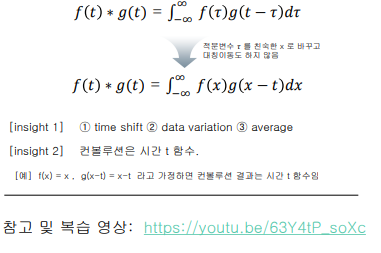


**CNN (Convolution Neuron Network)**
* Convolution : 데이터의 위치를 찾아내기 위한 통신 용어다. 
* t=tou, 타우 // 근데 우리는 낯설으니까 친숙한 x로 변환해야지
* g(t-x) = g(-(x-t)) >>> 그러나 무한대 부터 무한대 이므로 g(x-t)로 해도 무방함
* integral(f(x)g(x-t))dx
    * convolution 하기 위해서는 t가 정해져야 한다. 
    * 그러나 t는 계속 바뀌고 그럴 때마다 g(x-t)도 변한다. 

<center>


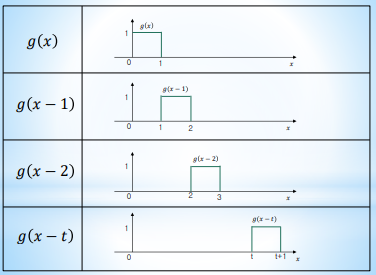

원본 값(f(x))은 가만히 있고, t에 따라서 위치가 계속 바뀌게 된다!
* f(x) = 원본 이미지 
* g(x) = 일종의 scanner 같은 느낌이네.. 이것을 업데이트 하면서 확인. <br> 즉 g(x)가 w,b를 포함하고 있다. 이것을 <u>커널 또는 필터</u>라고 부른다. 

<center>


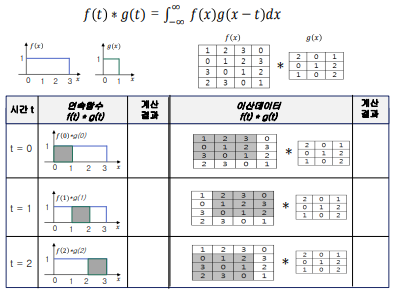

**Convolution in Wiki**
<center>
<img src = "https://upload.wikimedia.org/wikipedia/commons/6/6a/Convolution_of_box_signal_with_itself2.gif"> <br>
<img src = "https://upload.wikimedia.org/wikipedia/commons/b/b9/Convolution_of_spiky_function_with_box2.gif">

Counvolution은 위치정보 즉, 공간정보를 알아내는 것이다. 
edge를 파악하는 것은 급격한 색상정보의 변경 때문이다. 

<img src = "https://blog.kakaocdn.net/dn/7xpIJ/btrxiXZwws7/QQckg2sKVSwApKcEDdChi0/img.gif">

# 컨볼루션 예제 1

MNIST 3번째 데이터인 x_train[2] 데이터에 대해서, 다음과 같은 3 x 3 필터에 대해 컨벌루션연산을 하는 conv2d_simple(input_image, filter, filter_size) 구현하고 컨벌루션 결과를 이미지로 출력하시오.<br>

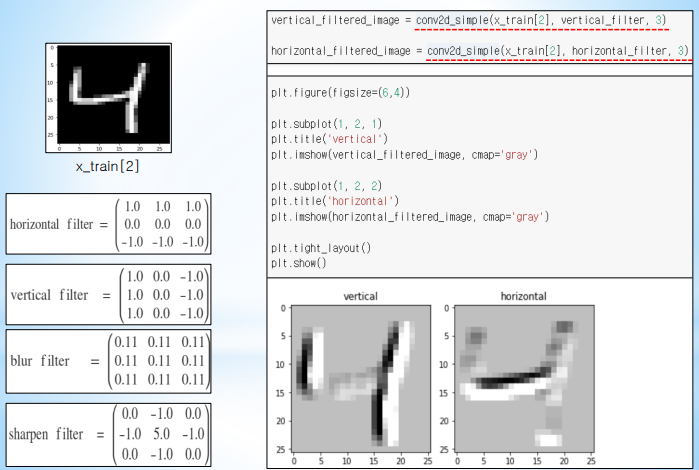

**1. 데이터 로드**

<function matplotlib.pyplot.show>

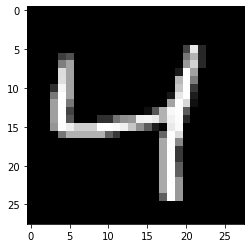

In [ ]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

#minst data download
(x_train, y_train),(x_test,y_test) = mnist.load_data()

plt.imshow(x_train[2], cmap='gray')
plt.show

**2. 이미지필터 정의**
예전에는 직접 계산하였지만, 이제 딥러닝으로 자동학습함.

In [ ]:
import numpy as np

horizontal_filter = np.array([[1.,1.,1.],
                              [0.,0.,0.],
                              [-1.,-1.,-1.]])

vertical_filter = np.array([[1.,0.,-1.],
                            [1.,0.,-1.],
                            [1.,0.,-1.]])

blur_filter = np.array([[0.11,0.11,0.11],
                        [0.11,0.11,0.11],
                        [0.11,0.11,0.11]])


sharpen_filter = np.array([[0.0,-1.0,0.0],
                           [-1.0,5.0,-1.0],
                           [0.0,-1.0,0.0]])

edge_1_filter = np.array([[1., 0., -1.],
                           [0., 0., 0.],
                           [-1., 0., 1.]])

edge_2_filter = np.array([[0., -1., 0.],
                           [-1., 4., -1.],
                           [0., -1., 0.]])

edge_3_filter = np.array([[-1., -1., -1.],
                           [-1., 8., -1.],
                           [-1., -1., -1.]])


**3. conv2d_simple()**
* con2d 내부 함수를 탐구하기.
* 컨볼루션 연산 함수, stride=1, padding 없이 순수 연산

In [ ]:
def conv2d_simple(input_image, filter, filter_size):

    original_image_size = input_image.shape[0]

    conv_output_size = int((original_image_size - 3)/1 + 1)
    """
    컨볼루션 연산을 통한 출력 데이터 크기(shape) 계산 공식
    >>  OH = ( H + 2P - FH)/S + 1
        OH,OW : 출력데이터 크기
        H,W : 입력데이터 크기
        P : 패딩
        S : 스트라이드 - 필터(커널)의 이동간격(step size)
        참고 사이트 : https://yjam.tistory.com/69
    """

    filtered_image = np.zeros((conv_output_size, conv_output_size))
    #conv_output_size의 크기를 반으로 맞춘다음 빈 공간(0으로 초기화)을 만듦.

    for i in range(conv_output_size): #t값을 세팅하는 것

        for j in range(conv_output_size):

            # 컨볼루션 연산
            conv_result = input_image[i:(i + filter_size), j:(j + filter_size)] * filter 
                                    #[0:3,0:3] 필터크기 만큼 슬라이싱 해줌
            conv_sum = np.sum(conv_result)

            if(conv_sum > 255):
                conv_sum = 255 #image의 색은 255까지만 나오니까 강제로 clipping 해준다. 
                
            filtered_image[i, j] = conv_sum
      
    return filtered_image

컨볼루션 연산 수행 및 결과 확인

In [ ]:
vertical_filtered_image = conv2d_simple(x_train[2], vertical_filter, 3)

horizontal_filtered_image = conv2d_simple(x_train[2], horizontal_filter, 3)

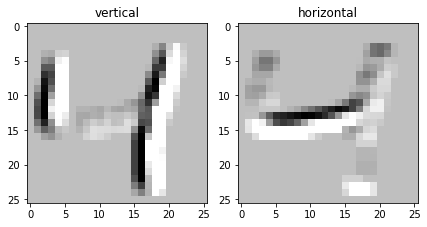

In [ ]:
plt.figure(figsize=(6,4))

plt.subplot(1, 2, 1)
plt.title('vertical')
plt.imshow(vertical_filtered_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('horizontal')
plt.imshow(horizontal_filtered_image, cmap='gray')

plt.tight_layout()
plt.show()

In [ ]:
blur_filtered_image = conv2d_simple(x_train[2], blur_filter, 3)

sharpen_filtered_image = conv2d_simple(x_train[2], sharpen_filter, 3)

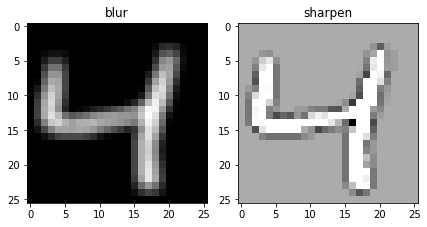

In [ ]:
plt.figure(figsize=(6,4))

plt.subplot(1, 2, 1)
plt.title('blur')
plt.imshow(blur_filtered_image,cmap='gray')

plt.subplot(1, 2, 2)
plt.title('sharpen')
plt.imshow(sharpen_filtered_image,cmap='gray')

plt.tight_layout()
plt.show()

In [ ]:
edge_1_filtered_image = conv2d_simple(x_train[2], edge_1_filter, 3)

edge_2_filtered_image = conv2d_simple(x_train[2], edge_2_filter, 3)

edge_3_filtered_image = conv2d_simple(x_train[2], edge_3_filter, 3)

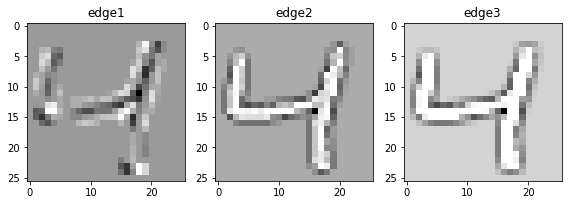

In [ ]:
plt.figure(figsize=(8,8))

plt.subplot(1, 3, 1)
plt.title('edge1')
plt.imshow(edge_1_filtered_image,cmap='gray')

plt.subplot(1, 3, 2)
plt.title('edge2')
plt.imshow(edge_2_filtered_image,cmap='gray')

plt.subplot(1, 3, 3)
plt.title('edge3')
plt.imshow(edge_3_filtered_image,cmap='gray')

plt.tight_layout()
plt.show()

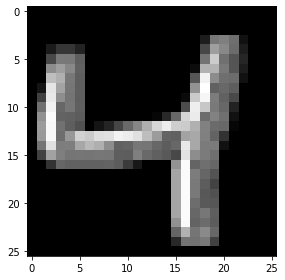

In [ ]:
sobel_image = np.sqrt(np.square(horizontal_filtered_image) 
+ np.square(vertical_filtered_image)
+np.square(blur_filtered_image)
+np.square(sharpen_filtered_image))

plt.imshow(sobel_image,cmap='gray')

plt.tight_layout()
plt.show()

# [2] 아키텍처의 이해 2

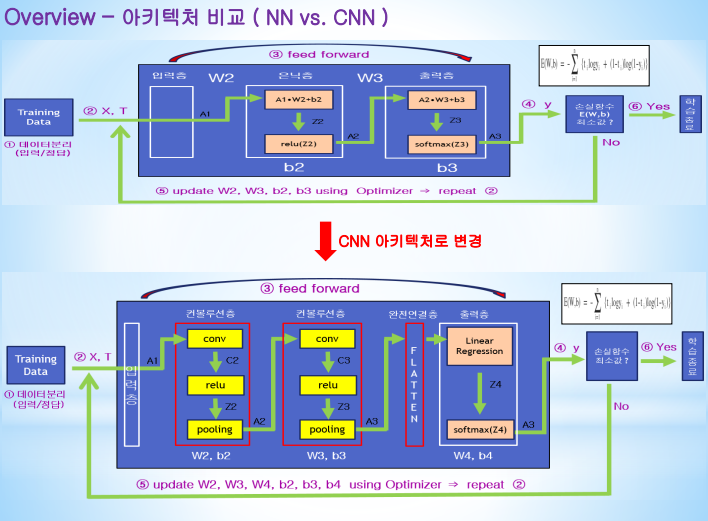

**입력층 -> 컨볼루션층 -> 완전연결층 -> 출력층**
1. 컨볼루션층
    * conv --> 적분(선형회귀)
    * relu --> activation func. : 비선형성 추가(CNN에서는 주로 relu)
    * pooling --> 데이터를 압축시켜줌
        * 여러 방법이 있다. 
    * 컨볼루션을 거칠수록 해당 특징 안에 또다른 세부 특징을 찾아냄

2. 완전연결층
    * flatten --> 3차원 이미지(텐서) 계산을 1차원으로 전환

3. 출력층
    * softmax --> 분류해야하니까 이걸 써야지 

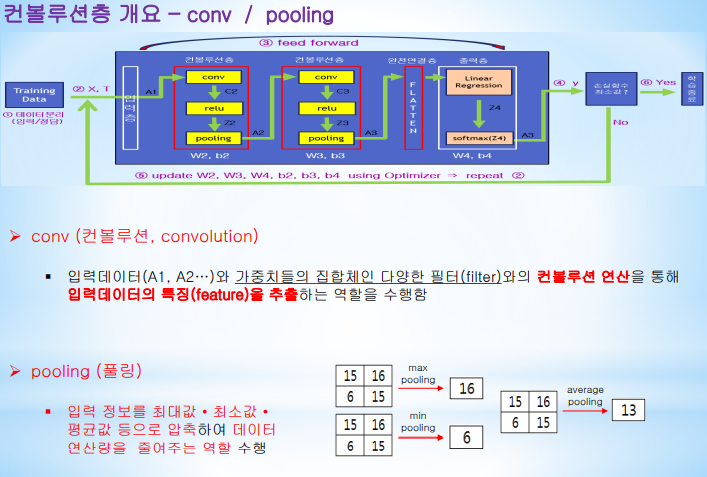

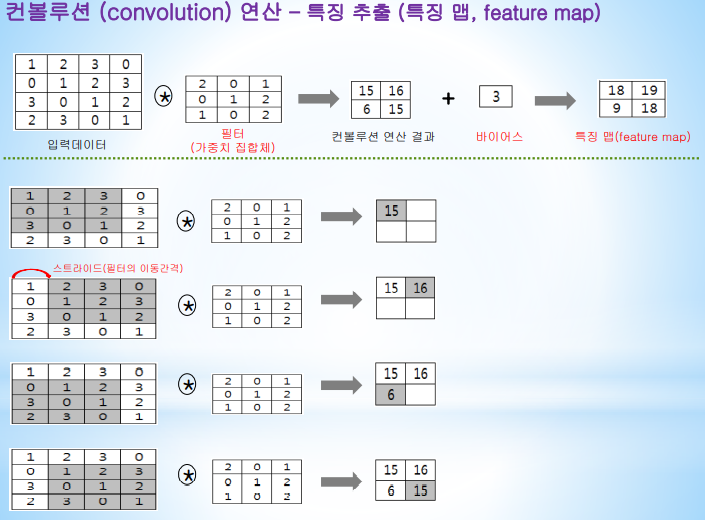

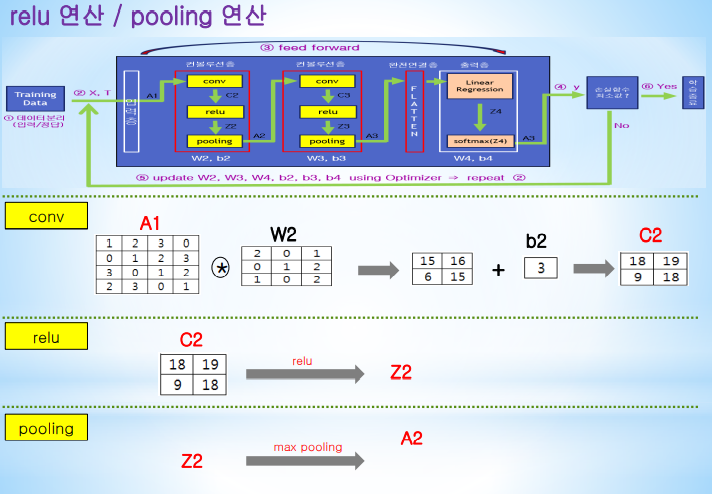

컨볼루션의 결과 = feature map<br>
위에서 c2에 해당함

c2<br>
18 19 <br>
9 18

relu는 0 이하인 값만 0으로 만들어 버리기 때문에
c2 = z2 <br>
18 19 <br>
9 18

max pooling은 최대값만 가지므로,<br>
A2 = 18

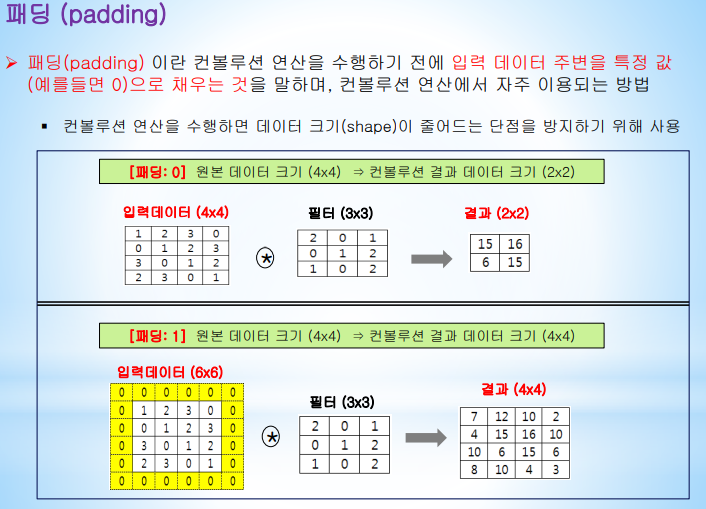

컨볼루션 특성상 원본데이터에 비해 줄어든 데이터 주위에 0으로 채워줌. 대신, 오차가 생긴다.

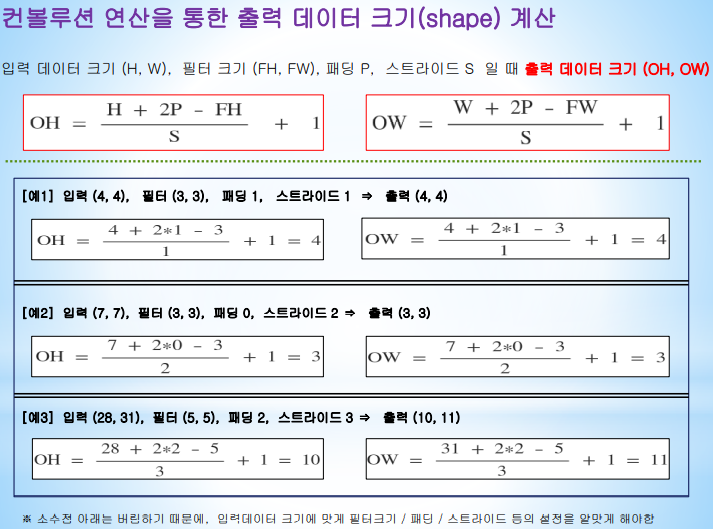